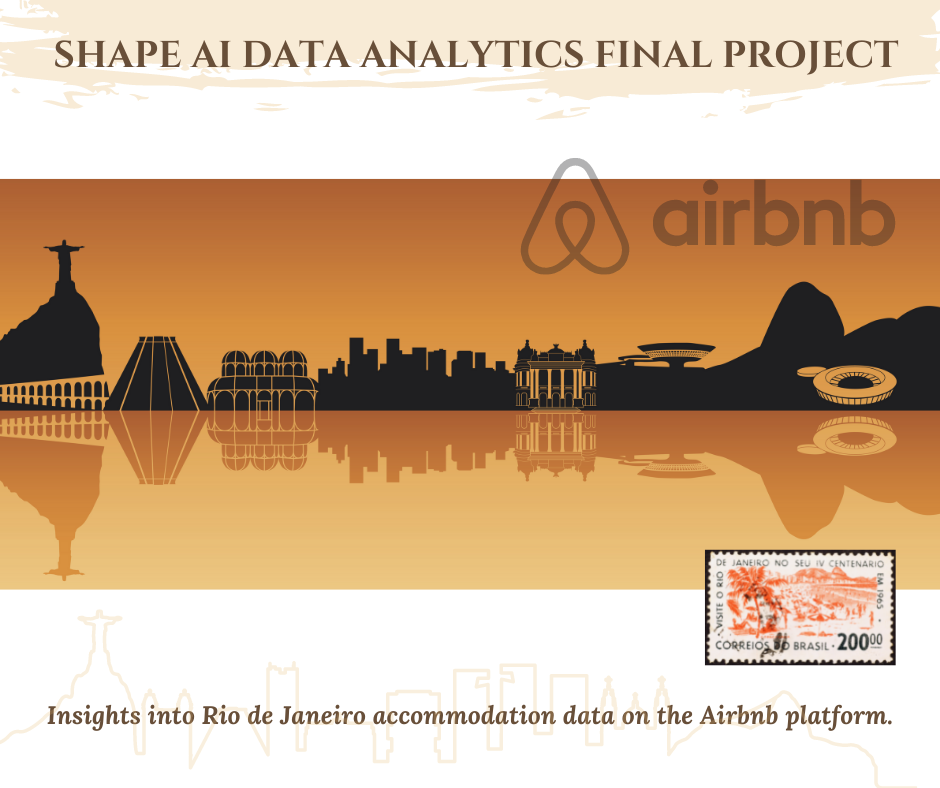

## Rio de Janeiro

Rio de Janeiro is a Brazilian municipality, capital of the homonymous state, located in the Southeast of the country. The largest international tourist destination in Brazil, Latin America and the entire Southern Hemisphere, the capital of Rio de Janeiro is the best known Brazilian city abroad, functioning as a national "mirror", or "portrait", whether positively or negatively. It is the second largest metropolis in Brazil (after São Paulo), the sixth largest in America and the thirty-fifth in the world. Its population estimated by IBGE for July 1, 2020 was 6 747 815 inhabitants. It has the epithet of Cidade Maravilhosa and the one who is born there is called Carioca.

It is one of the main economic, cultural and financial centers in the country, being internationally known for several cultural and landscape icons, such as Sugarloaf Mountain, the Corcovado Mountain with the statue of Christ the Redeemer, the beaches of the Copacabana, Ipanema and Barra neighborhoods from Tijuca, among others; the Maracanã and Nilton Santos stadiums; the bohemian neighborhood of Lapa and its arches; the Municipal Theater of Rio de Janeiro; the Tijuca and Pedra Branca forests; Quinta da Boa Vista; the National Library; the island of Paquetá; New Year's Eve in Copacabana; the carioca carnival; Bossa Nova and samba. Part of the city was designated a World Heritage Site by UNESCO on July 1, 2012.

It represents the second largest GDP in the country (and the 30th largest in the world), estimated at around 329 billion reais (IBGE/2016), and is home to the two largest Brazilian companies - Petrobras and Vale, and the main companies of oil and telephony in Brazil, in addition to the largest conglomerate of media and communications companies in Latin America, Grupo Globo. Contemplated by a large number of universities and institutes, it is the second largest research and development center in Brazil, accounting for 19% of national scientific production, according to 2005 data. Rio de Janeiro is considered a beta global city - according to the 2008 inventory of the Loughborough University (GaWC).

Consequently, we can agree that taking a trip to Rio de Janeiro wouldn't be bad.

## Obtaining the Data

The data used was obtained from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Because this is an initial exploratory analysis, the data used in this project is a summary version of the dataset.

In [141]:
# import the necessary packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [142]:
# import the file listings.csv to a DataFrame

df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-03-21/visualisations/listings.csv')


## Data analysis

At this stage, the objective is to ensure an understanding of how the data is structured, so that the reader is aware of what will be analyzed. Therefore, a dictionary will be presented regarding each of the variables.

**Dictionary of variables**

* `id` - property identification number
* `name` - Title of property listing
* `host_id` - owner identification number
* `host_name` - hostname
* `neighbourhood_group` - column with no valid values
* `neighbourhood` - name of the neighborhood
* `latitude` - latitude coordinate of the property
* `longitude` - longitude coordinate of the property
* `room_type` - type of accommodation offered
* `price` - rental amount
* `minimum_nights` - lowest number of nights to rent
* `number_of_reviews` - ​​number of reviews
* `last_review` - date of last review
* `reviews_per_month` - amount of reviews in a month
* `calculated_host_listings_count` - amount of properties from the same host
* `availability_365` - number of days of availability within 365 days

Before we go to the analysis, let's know a little about our *dataset*, taking a look at the first 5 entries.

In [143]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,200,5,260,2021-02-08,2.00,1,334
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,37
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,275,2,181,2020-03-15,2.00,1,236
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,120,3,356,2021-03-06,2.79,1,120
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,494,3,18,2016-02-09,0.18,2,365


### **Q1. How many attributes (variables) and how many entries does our dataset have? What types of variables?**

With a few lines of code, it is possible to notice the presence of 16 variables and 26628 entries, some of which are of types, integer, float, and object.

In [144]:
# identify DataFrame data volume
print('Entries:\t {}'.format(df.shape[0]))
print('Variables:\t {}'.format(df.shape[1]))
# check the first 5 entries of the dataset
display(df.dtypes)

Entries:	 26628
Variables:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. What is the percentage of missing values ​​in the *dataset*?**

When we look for a *dataset* we want one with quality, it is possible to measure this according to the quantity of missing values. It is necessary to understand whether the null values ​​are significant compared to the total entries.

* In the column `neighbourhood_group` you can see that 100% of the values ​​were not entered
* Approximately 37% of the values ​​of `reviews_per_month` and `last_review` variables are null
* Only 0.1% of the `name` variable values ​​are null

In [145]:
# sort the variables in descending order by their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False) 

neighbourhood_group               1.000000
last_review                       0.373329
reviews_per_month                 0.373329
host_name                         0.027039
name                              0.001089
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [146]:
# excluding missing values
df.drop(columns=['neighbourhood_group'], inplace=True)
df.dropna(axis=0, inplace=True)

# checking the result
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### **Q3. What is the type of distribution of variables?**

In order to have a better view of the distribution of variables, I will plot a histogram.

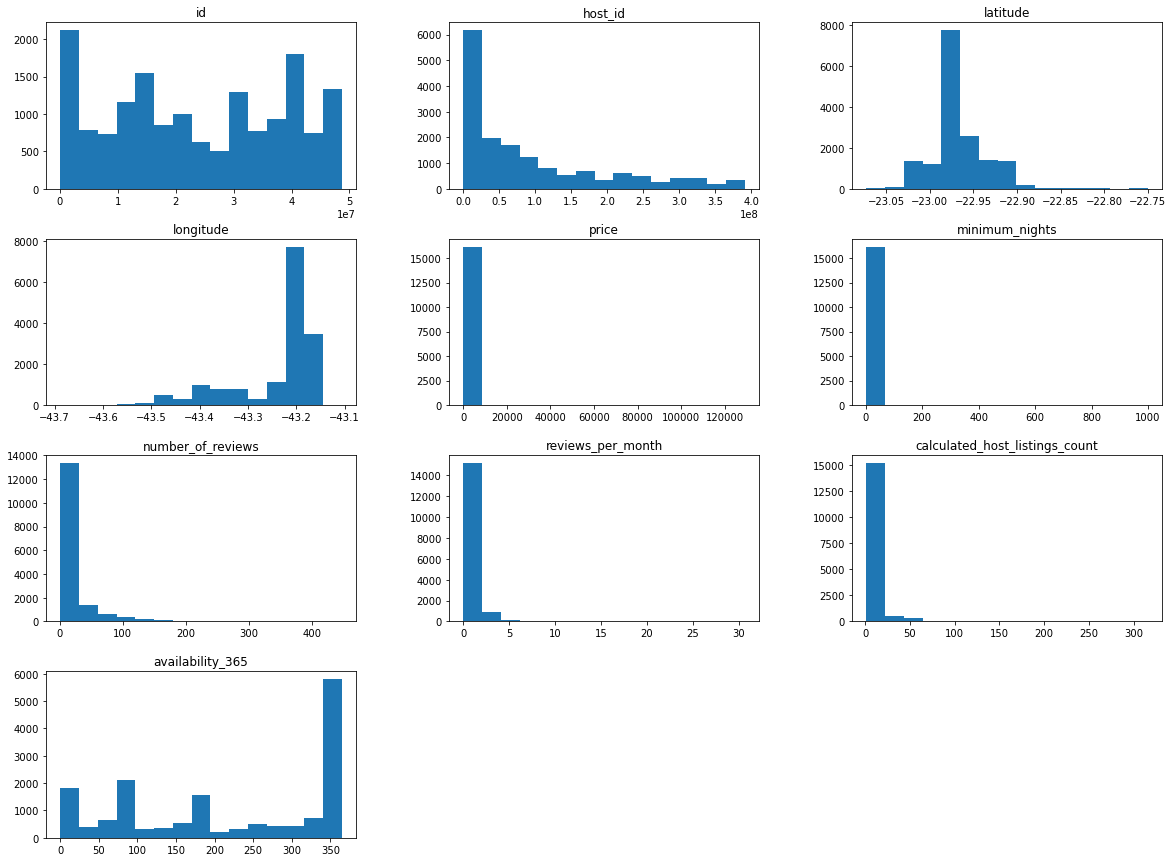

In [147]:
# plot the histogram of numeric variables
df.hist(bins=15, figsize=(20,15), grid=False);

### **Q4. Are there *Outliers* present?**

If we pay attention to the way in which the histogram is distributing the data, we can find indications of the presence of *outliers*. It is possible to take as an example the variablesprice`price`, `minimum_nights` and `calculated_host_listings_count`.

Values ​​do not follow a distribution, and distort the graphical representation. To confirm, there are two quick ways to help detect *outliers*. Are they:

In [148]:
# see summary statistics of numeric variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000
mean,471.033662,3.797596,19.458570,0.610551,6.194266,218.127065
std,3086.597639,16.653730,35.804724,0.860710,20.866613,134.700425
min,33.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,140.000000,2.000000,2.000000,0.090000,1.000000,89.000000
50%,220.000000,2.000000,6.000000,0.270000,2.000000,233.000000
75%,392.000000,3.000000,19.000000,0.810000,4.000000,362.000000
max,129080.000000,1000.000000,447.000000,30.650000,316.000000,365.000000


## Looking at the statistical summary above, we can confirm some hypotheses such as:

* The `price` variable has 75% of the value below 392, but its maximum value is 129080.
* The maximum value for the variable (`minimum_nights`) is above 365 days in the year.

#### **Setting thresholds for 'minimum_nights'**

In [149]:
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nigths: ', sup_minimum_nights)
print('Limite inferios de minimum_nigths: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nigths:  4.5
Limite inferios de minimum_nigths:  0.5


#### **Boxplot para minimum_nights**

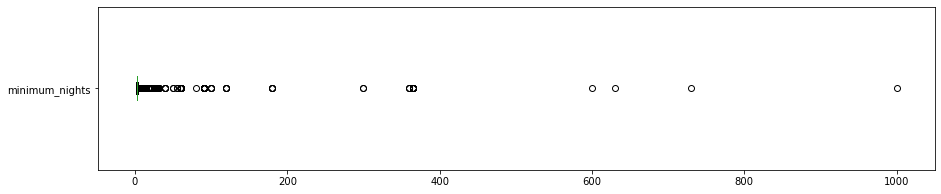

minimum_nights: valores acima de 4.5:
2390 entradas.
14.7349%


In [150]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# see amount of values ​​above 4.5 days for minimum_nights
print('minimum_nights: valores acima de 4.5:')
print('{} entradas.'.format(len(df[df.minimum_nights > 4.5])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 4.5]) / df.shape[0])*100))

With that we can extract some information:

* About 2390 accommodations have a minimum of over 4.5 nights
* These accommodations represent only 14.7% of the *dataset*

#### **Setting thresholds for 'Price'**

In [151]:
# identifying the outliers for the price variable
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR of the price variable: ', IQR_price)

# setting the limits
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit of price: ', sup_price)
print('Lower limit of price: ', inf_price)

IQR of the price variable:  252.0
Upper limit of price:  770.0
Lower limit of price:  -238.0


#### **Boxplot for price**

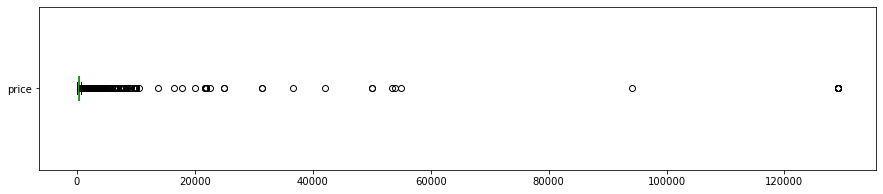


price: valores acima de 770
1477 entradas
9.1060%


In [152]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# see amount of values ​​above 770 for price
print('\nprice: valores acima de 770')
print('{} entradas'.format(len(df[df.price > 770])))
print('{:.4f}%'.format((len(df[df.price > 770]) / df.shape[0])*100))

Some insights taken from this analysis:

* There are approximately 1477 accommodation entries with values ​​above 770 reais.
* And these accommodations represent only 9.1% of the *dataset*

#### **Cleaning the dataset**

After we've identified *outliers* in the `price` and `minimum_nights` variables, let's clean up the *Dataset*.

In [153]:
# removing *outliers* in a new DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 770].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 4.5].index, axis=0, inplace=True)

print('Shape before da limpeza: ', df.shape)
print('Shape after da limpeza: ', df_clean.shape)


Shape before da limpeza:  (16220, 15)
Shape after da limpeza:  (12694, 15)


#### **Histograms without *outliers***

With the Dataset clean, I will plot a histogram without the outliers present.

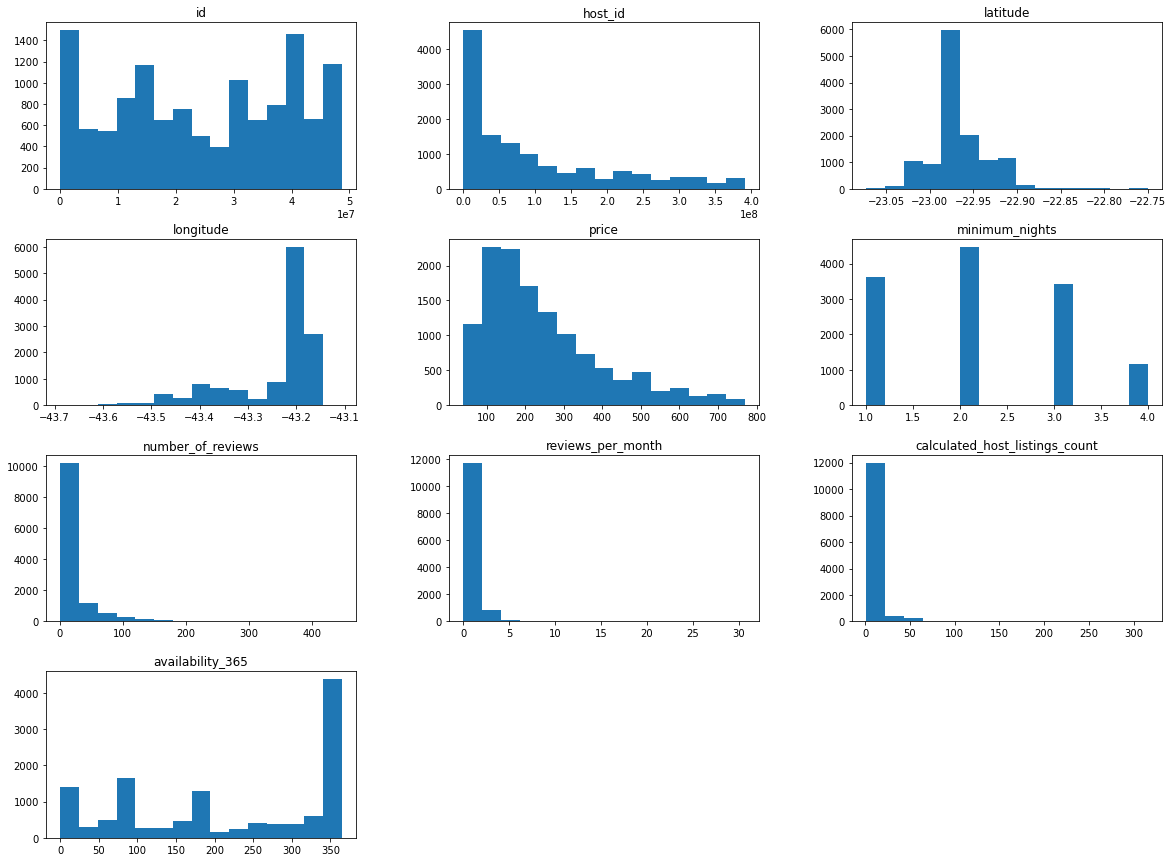

In [154]:
# plot the histogram for numeric variables
df_clean.hist(bins=15, figsize=(20,15), grid=False);

In [155]:
# checking the statistical distribution of clean data
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,12694.0,12694.0,12694.0,12694.0,12694.0,12694.0,12694.0,12694.0,12694.0,12694.0
mean,24734791.4,98336717.1,-23.0,-43.2,244.4,2.2,21.5,0.7,6.2,216.6
std,15140068.8,105406644.7,0.0,0.1,153.0,0.9,38.4,0.9,21.7,133.6
min,24480.0,11739.0,-23.1,-43.7,39.0,1.0,1.0,0.0,1.0,0.0
25%,11826004.2,13596474.0,-23.0,-43.3,130.0,1.0,2.0,0.1,1.0,89.0
50%,24099386.5,56285845.5,-23.0,-43.2,200.0,2.0,6.0,0.3,2.0,224.0
75%,39407385.5,157846622.2,-23.0,-43.2,314.0,3.0,22.0,0.9,3.0,362.0
max,48719391.0,391010691.0,-22.7,-43.1,770.0,4.0,447.0,30.6,316.0,365.0


### **Q5. What is the average rental price?**

In an analysis where we have the rent value, it becomes interesting to know the average of this value. In order to take *insights* that help in the calculation of the expense of the accommodation, in a possible trip.

* It was possible to verify that the *average* rent for the accommodations is **`244.39 reais`**.

In [156]:
# see the average of the `price` column
df_clean['price'].mean()

244.39940129194895

### **Q6. What is the correlation between the variables?**

Correlation means that there is a relationship between two things. In the context of analysis, we can look for a relationship or similarity between two variables.

These relationships can be measured, and it is a function of the relationship coefficient to establish how strong it is. To identify the correlations between the variables of interest, I will:

* Create a correlation matrix
* Generate a *heatmap* from this array, using the `seaborn` library


In [157]:
# create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# show the correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.157321,-0.099718,-0.150920,0.094645,0.039320
minimum_nights,0.157321,1.000000,0.040229,-0.087226,-0.064414,-0.088154
number_of_reviews,-0.099718,0.040229,1.000000,0.591375,-0.042427,-0.052388
reviews_per_month,-0.150920,-0.087226,0.591375,1.000000,-0.002986,-0.124209
calculated_host_listings_count,0.094645,-0.064414,-0.042427,-0.002986,1.000000,0.018022
availability_365,0.039320,-0.088154,-0.052388,-0.124209,0.018022,1.000000


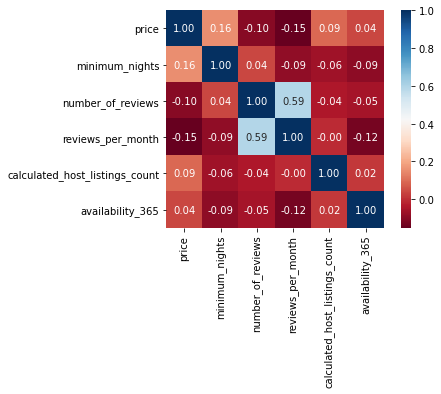

In [158]:
# plot a heatmap from correlations
sns.heatmap(corr, cmap='RdBu' , fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. What is the most rented property type on Airbnb?**

The `room_type` column indicates which property category is advertised on the platform. On the website, there are options for apartments/entire houses, renting a private room or even sharing the same room with other people.

Let's count the number of occurrences of each type of rental, using the `value_counts()` method.

In [159]:
# show the amount of each type of property available
df_clean.room_type.value_counts()

Entire home/apt    9015
Private room       3379
Shared room         244
Hotel room           56
Name: room_type, dtype: int64

The types of properties that appear the most are, in order:
* Entire House/Apt
* Private rooms
* Shared rooms
* Hotel Rooms

In [160]:
# show the percentage of each type of property available
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.555795
Private room       0.208323
Shared room        0.015043
Hotel room         0.003453
Name: room_type, dtype: float64

##### The properties have a very interesting distribution, see:
* `Whole houses/apts` and `Private rooms` occupy about 75% of advertised properties
* And only 1% are `Shared Rooms`

### **Q7. What is the most expensive location in Rio de Janeiro?**

It is possible to check one variable against another using `groupby()`. In this case, we want to compare the neighborhoods (*neighbourhoods*) from the rent price.

In [161]:
# see prices by neighborhood, on average
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Padre Miguel         642.000000
Abolição             600.000000
Sepetiba             600.000000
Leblon               359.021488
Deodoro              350.000000
Alto da Boa Vista    343.071429
Del Castilho         338.000000
Cidade de Deus       318.000000
Ipanema              314.074510
Higienópolis         305.000000
Name: price, dtype: float64

Above we can see that the average values ​​of **Padre Miguel**, **Abolição** and **Sepetiba** are very close, different from other neighborhoods such as **Higienópolis** and **Ipanema**, which have very good values. lower.

I'm not an expert in Rio de Janeiro so I can't speak properly about the reason for this classification of averages, but it is possible to verify which neighborhoods have more properties advertised, and clarify the doubt if this is due to the amount of properties present in each of the neighborhoods . See below:


In [165]:
# defining variables to see the amount of properties in each region

pdm = df_clean[df_clean.neighbourhood == 'Padre Miguel'].shape[0]

abl = df_clean[df_clean.neighbourhood == 'Abolição'].shape[0]

spb = df_clean[df_clean.neighbourhood == 'Sepetiba'].shape[0]

lb = df_clean[df_clean.neighbourhood == 'Leblon'].shape[0]

dd = df_clean[df_clean.neighbourhood == 'Deodoro'].shape[0]

abv = df_clean[df_clean.neighbourhood == 'Alto da Boa Vista'].shape[0]

dc = df_clean[df_clean.neighbourhood == 'Del Castilho'].shape[0]

cd = df_clean[df_clean.neighbourhood == 'Cidade de Deus'].shape[0]

ip = df_clean[df_clean.neighbourhood == 'Ipanema'].shape[0]

hi = df_clean[df_clean.neighbourhood == 'Higienópolis'].shape[0]


# Printing the number of properties in each region

print('The number of properties in Padre Miguel is :\t {}'.format(pdm))

print('The number of properties in Abolição is :\t {}'.format(abl))

print('The number of properties in Sepetiba is :\t {}'.format(spb))

print('The number of properties in Leblon is :\t {}'.format(lb))

print('The number of properties in Deodoro is :\t {}'.format(dd))

print('The number of properties in Alto da Boa Vista is :\t {}'.format(abv))

print('The number of properties in Del Castilho is :\t {}'.format(dc))

print('The number of properties in Cidade de Deus is :\t {}'.format(cd))

print('The number of properties in Ipanema is :\t {}'.format(ip))

print('The number of properties in Higienópolis is :\t {}'.format(hi))

The number of properties in Padre Miguel is :	 1
The number of properties in Abolição is :	 1
The number of properties in Sepetiba is :	 1
The number of properties in Leblon is :	 605
The number of properties in Deodoro is :	 1
The number of properties in Alto da Boa Vista is :	 14
The number of properties in Del Castilho is :	 3
The number of properties in Cidade de Deus is :	 5
The number of properties in Ipanema is :	 1275
The number of properties in Higienópolis is :	 2


With that we were able to draw some conclusions:

* The ads with only one property like Padre Miguel, Abolição and Sepetiba are where the most expensive properties are advertised, probably because they only have one property, inflating the price.
* Although Ipanema has the largest number of ads, it is not the cheapest option, the two properties in Higienópolis are the cheapest alternative. More analysis would be needed to understand this exception that occurs in the Higienópolis neighborhood, analyzing the size of the property or the standard, for example.

Since Latitudes and Longitudes for properties are provided, it is possible to plot each point. For this, `x=longitude` and `y=latitude` are considered.

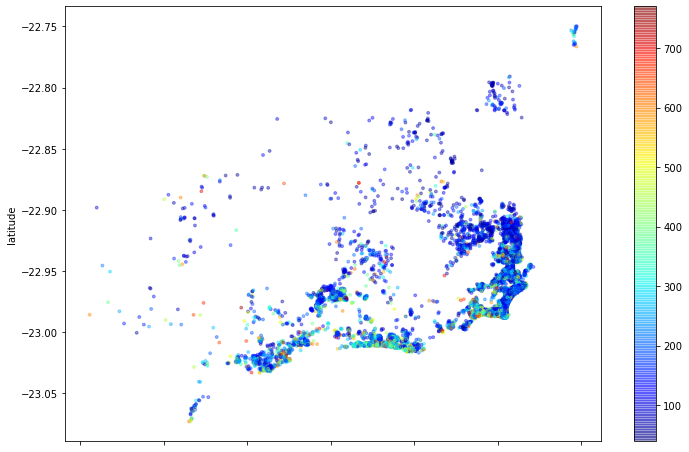

In [163]:
# plot properties by latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

# **Q8. What is the average minimum rental nights (minimum_nights)?**

We can see that the average minimum number of nights is 2 nights, this shows us that the owners tend to make the properties available for at least 2 nights (weekends)

In [164]:
# see the average of the `minimum_nights` column

df_clean['minimum_nights'].mean()

2.170237907672916

## Conclusions

In this project, we managed to get some information about **Airbnb** in the city of Rio de Janeiro.
If we consider that the minimum wage in Rio de Janeiro is 1,100 reais, this shows that accommodation is expensive, as the average price is `244.39` reais, which is about 22% of the minimum wage.

Some other information:

* About 55% of ads are only for `Whole Houses/Apts`
* The places with the lowest number of properties advertised are `Padre Miguel`, `Abolição`, `Sepetibal` and `Deodoro`, all with only one property advertised
* Average `minimum_nights` is approximately 2 nights, probably for guests to rent for at least a weekend (Saturday and Sunday).

Upon completing this project, we learned that the data is not always complete. Several values ​​were missing and needed to be cleared as they were outliers, causing our results and outputs to differ greatly from reality before they were addressed.
We learned that sometimes the outputs may not represent reality, inducing analyzing data to be distorted producing dubious insights.
Although we have a fair amount of insight, this `csv` used is just a shortened version of the real dataset. To truly explore the data and have the best insights, the ideal would be to use a full version of the `csv` file, which contains many more variables and attributes.